In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
run_id_number = 5

In [3]:
# Set whether running the below data cleaning steps on input (training) or prediction (test)
# 1 ---- training:   run_type = 1
# 2 ---- prediction: run_type = 2 (or anything other than 1)

run_type = 1

In [4]:
if run_type == 1:
    df = pd.read_csv('datasets/train.csv')
else:
    df = pd.read_csv('datasets/test.csv')

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# df['saleprice'].isna().sum()

In [6]:
# df = df.dropna(subset=['saleprice'])
# df.shape

In [7]:
df.shape

(2051, 81)

In [8]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [10]:
df.isnull().sum().sort_values(ascending=False).head(30)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
sale_type            0
full_bath            0
half_bath            0
dtype: int64

### Dropping Unneeded columns

In [11]:
# df.drop(columns=['id','pid'], inplace=True)
df.drop(columns=['pid'], inplace=True)
df.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [12]:
df.describe()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [13]:
numeric_data_cols = ['lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']

### Converting ordinal data

In [14]:
#Fix Lot Shape col into ordinal data
# Reg	Regular	(3);        IR1	Slightly irregular (2);       IR2	Moderately Irregular (1);       IR3	Irregular (0)

lot_shape_key = {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0, np.nan:0}
df['lot_shape'] = df['lot_shape'].map(lot_shape_key)

df['lot_shape'].value_counts()

3    1295
2     692
1      55
0       9
Name: lot_shape, dtype: int64

In [15]:
#Fix Utilities col into ordinal data
#        AllPub	All public Utilities (E,G,W,& S) (4)
#        NoSewr	Electricity, Gas, and Water (Septic Tank) (3)
#        NoSeWa	Electricity and Gas Only (2)
#        ELO	Electricity only	(1)

utils_key = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1, np.nan:0}
df['utilities'] = df['utilities'].map(utils_key)

df['utilities'].value_counts()

4    2049
2       1
3       1
Name: utilities, dtype: int64

In [16]:
#Fix Land Slope col into ordinal data
# Gtl	Gentle slope (0);       Mod	Moderate Slope	(1);       Sev	Severe Slope (2)

land_slope_key = {'Sev':2, 'Mod':1, 'Gtl':0, np.nan:0}
df['land_slope'] = df['land_slope'].map(land_slope_key)

df['land_slope'].value_counts()

0    1953
1      88
2      10
Name: land_slope, dtype: int64

In [17]:
#Fix Exter Qual col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);       Fa	Fair (2);       Po	Poor (1)

ext_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['exter_qual'] = df['exter_qual'].map(ext_qual_key)

df['exter_qual'].value_counts()

3    1247
4     697
5      81
2      26
Name: exter_qual, dtype: int64

In [18]:
#Fix Exter Cond col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);       Fa	Fair (2);       Po	Poor (1)

ext_cond_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['exter_cond'] = df['exter_cond'].map(ext_cond_key)

df['exter_cond'].value_counts()

3    1778
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64

In [19]:
#Fix Bsmt Qual col into ordinal data
# Ex	Excellent (100+ inches) (5);        Gd	Good (90-99 inches) (4);       TA	Typical (80-89 inches) (3);       
# Fa	Fair (70-79 inches) (2);       Po	Poor (<70 inches (1);    NA	No Basement (0)

bsmt_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['bsmt_qual'] = df['bsmt_qual'].map(bsmt_qual_key)

df['bsmt_qual'].value_counts()

3    887
4    864
5    184
2     60
0     55
1      1
Name: bsmt_qual, dtype: int64

In [20]:
#Fix Bsmt Cond col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1);    NA	No Basement (0)

bsmt_cond_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['bsmt_cond'] = df['bsmt_cond'].map(bsmt_cond_key)

df['bsmt_cond'].value_counts()

3    1834
4      89
2      65
0      55
1       5
5       3
Name: bsmt_cond, dtype: int64

In [21]:
#Fix Bsmt Exposure col into ordinal data
# Gd	Good (4);       Av	Average Exposure (3);   Mn	Mimimum Exposure (2);    No	No Exposure (1);    NA	No Basement (0)

bsmt_exposure_key = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0, np.nan:0}
df['bsmt_exposure'] = df['bsmt_exposure'].map(bsmt_exposure_key)

df['bsmt_exposure'].value_counts()

1    1339
3     288
4     203
2     163
0      58
Name: bsmt_exposure, dtype: int64

In [22]:
#Fix BsmtFin Type 1 col into ordinal data
#  GLQ	Good Living Quarters (6);       ALQ	Average Living Quarters (5);       BLQ	Below Average Living Quarters (4);
#  Rec	Average Rec Room (3);   LwQ	Low Quality (2);    Unf	Unfinshed (1);       NA	No Basement (0)

bsmtfin_type_1_key = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0, np.nan:0}
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].map(bsmtfin_type_1_key)

df['bsmtfin_type_1'].value_counts()

6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: bsmtfin_type_1, dtype: int64

In [23]:
#Fix BsmtFin Type 2 col into ordinal data
#  GLQ	Good Living Quarters (6);       ALQ	Average Living Quarters (5);       BLQ	Below Average Living Quarters (4);
#  Rec	Average Rec Room (3);   LwQ	Low Quality (2);    Unf	Unfinshed (1);       NA	No Basement (0)

bsmtfin_type_2_key = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0, np.nan:0}
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].map(bsmtfin_type_2_key)

df['bsmtfin_type_2'].value_counts()

1    1749
3      80
2      60
0      56
4      48
5      35
6      23
Name: bsmtfin_type_2, dtype: int64

In [24]:
#Fix Heating QC col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1)

heating_qc_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['heating_qc'] = df['heating_qc'].map(heating_qc_key)

df['heating_qc'].value_counts()

5    1065
3     597
4     319
2      67
1       3
Name: heating_qc, dtype: int64

In [25]:
#Fix Central Air col into 1/0
#        N	No (0);   Y	Yes (1)

central_air_key = {'Y':1, 'N':0, np.nan:0}
df['central_air'] = df['central_air'].map(central_air_key)

df['central_air'].value_counts()

1    1910
0     141
Name: central_air, dtype: int64

In [26]:
#Fix Electrical col into ordinal data
# SBrkr	Standard Circuit Breakers & Romex (4); FuseA	Fuse Box over 60 AMP and all Romex wiring (Average) (3);
# FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (2); FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (1);
# Mix	Mixed (2) #!!!!

electrical_key = {'Ex':5, 'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':2, np.nan:1}   # DIFFERENT THAN TYPICAL!
df['electrical'] = df['electrical'].map(electrical_key)

df['electrical'].value_counts()

4    1868
3     140
2      36
1       7
Name: electrical, dtype: int64

In [27]:
#Fix Kitchen Qual col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1)

kitchen_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['kitchen_qual'] = df['kitchen_qual'].map(kitchen_qual_key)

df['kitchen_qual'].value_counts()

3    1047
4     806
5     151
2      47
Name: kitchen_qual, dtype: int64

In [28]:
#Fix Functional col into ordinal data
# Typ	Typical Functionality (7); Min1	Minor Deductions 1 (6); Min2	Minor Deductions 2 (5); Mod	Moderate Deductions (4);
# Maj1	Major Deductions 1 (3); Maj2	Major Deductions 2 (2);  Sev	Severely Damaged (1); Sal	Salvage only (0);

functional_key = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0, np.nan:0}
df['functional'] = df['functional'].map(functional_key)

df['functional'].value_counts()

7    1915
5      42
6      42
4      29
3      12
2       7
1       2
0       2
Name: functional, dtype: int64

In [29]:
#Fix Fireplace Qu col into ordinal data
# Ex	Excellent - Exceptional Masonry Fireplace (5);        Gd	Good - Masonry Fireplace in main level (4);       
# TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement (3);   
# Fa	Fair - Prefabricated Fireplace in basement (2);    Po	Poor - Ben Franklin Stove (1); NA	No Fireplace (0)

fireplace_qu_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['fireplace_qu'] = df['fireplace_qu'].map(fireplace_qu_key)

df['fireplace_qu'].value_counts()

0    1000
4     523
3     407
2      59
1      31
5      31
Name: fireplace_qu, dtype: int64

In [30]:
#Fix Garage Finish col into ordinal data
# Fin	Finished (3);   RFn	Rough Finished (2);    Unf	Unfinished (1); NA	No Garage (0)

garage_finish_key = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0, np.nan:0}
df['garage_finish'] = df['garage_finish'].map(garage_finish_key)

df['garage_finish'].value_counts()

1    849
2    579
3    509
0    114
Name: garage_finish, dtype: int64

In [31]:
#Fix Garage Qual col into ordinal data
# Ex	Excellent (100+ inches) (5);        Gd	Good (90-99 inches) (4);       TA	Typical (80-89 inches) (3);       
# Fa	Fair (70-79 inches) (2);       Po	Poor (<70 inches (1);    NA	No Basement (0)

garage_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['garage_qual'] = df['garage_qual'].map(garage_qual_key)

df['garage_qual'].value_counts()

3    1832
0     114
2      82
4      18
5       3
1       2
Name: garage_qual, dtype: int64

In [32]:
#Fix Garage Cond col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1);    NA	No Basement (0)

garage_cond_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['garage_cond'] = df['garage_cond'].map(garage_cond_key)

df['garage_cond'].value_counts()

3    1868
0     114
2      47
4      12
1       8
5       2
Name: garage_cond, dtype: int64

In [33]:
#Fix Paved Drive col into ordinal data
#        Y	Paved (2);        P	Partial Pavement (1);        N	Dirt/Gravel (0)

paved_drive_key = {'Y':2, 'P':1,'N':0, np.nan:0}
df['paved_drive'] = df['paved_drive'].map(paved_drive_key)

df['paved_drive'].value_counts()

2    1861
0     151
1      39
Name: paved_drive, dtype: int64

In [34]:
#Fix Pool Quality col into ordinal data

# Ex	Excellent (4);       Gd	Good (3);       TA	Average/Typical (2);       Fa	Fair (1);       NA	No Pool (0)

# df['pool_qc'].value_counts()
pool_qual_key = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0, np.nan:0}
df['pool_qc'] = df['pool_qc'].map(pool_qual_key)

df['pool_qc'].value_counts()

0    2042
3       4
1       2
2       2
4       1
Name: pool_qc, dtype: int64

In [35]:
#Fix Fence col into ordinal data

# GdPrv	Good Privacy (4); MnPrv	Minimum Privacy (3); GdWo	Good Wood (2); MnWw	Minimum Wood/Wire (1); NA	No Fence (0)

fence_key = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.nan:0}
df['fence'] = df['fence'].map(fence_key)

df['fence'].value_counts()

0    1651
3     227
4      83
2      80
1      10
Name: fence, dtype: int64

In [36]:
df.isna().sum().sort_values(ascending=False).head(10)

misc_feature      1986
alley             1911
lot_frontage       330
garage_yr_blt      114
garage_type        113
mas_vnr_type        22
mas_vnr_area        22
bsmt_full_bath       2
bsmt_half_bath       2
garage_cars          1
dtype: int64

In [37]:
df['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [38]:
df['bsmt_full_bath'].value_counts()

0.0    1200
1.0     824
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64

### Setting NaN's to 0 (or other) for columns where applicable

In [39]:
# df[df['bsmt_full_bath'].isna()]
# df.iloc[616]['bsmt_full_bath']

In [40]:
df.loc[df['lot_frontage'].isna(),'lot_frontage'] = 0
df.loc[df['mas_vnr_area'].isna(),'mas_vnr_area'] = 0

df.loc[df['bsmtfin_sf_1'].isna(),'bsmtfin_sf_1'] = 0
df.loc[df['bsmtfin_sf_2'].isna(),'bsmtfin_sf_2'] = 0
df.loc[df['bsmt_unf_sf'].isna(),'bsmt_unf_sf'] = 0
df.loc[df['total_bsmt_sf'].isna(),'total_bsmt_sf'] = 0
df.loc[df['bsmt_full_bath'].isna(),'bsmt_full_bath'] = 0
df.loc[df['bsmt_half_bath'].isna(),'bsmt_half_bath'] = 0
df.loc[df['full_bath'].isna(),'full_bath'] = 0         #0 count already anyways
df.loc[df['half_bath'].isna(),'half_bath'] = 0         #0 count already anyways
df.loc[df['bedroom_abvgr'].isna(),'bedroom_abvgr'] = 0 #0 count already anyways
df.loc[df['kitchen_abvgr'].isna(),'kitchen_abvgr'] = 0 #0 count already anyways
df.loc[df['totrms_abvgrd'].isna(),'totrms_abvgrd'] = 0 #0 count already anyways
df.loc[df['fireplaces'].isna(),'fireplaces'] = 0       #0 count already anyways
df.loc[df['garage_cars'].isna(),'garage_cars'] = 0
df.loc[df['garage_area'].isna(),'garage_area'] = 0

# FIX ME!!!!

# FIX ME!!!!

In [41]:
df['garage_yr_blt'].isna().sum()

114

In [42]:
#TBD how to handle NaN's
# 'garage_yr_blt',

# df.loc[df['garage_yr_blt'].isna(),'garage_yr_blt'] = 0
df.loc[df['garage_yr_blt']==2207,'garage_yr_blt'] = 2007   #correct an errant value to its assumed value
df.loc[df['garage_yr_blt'].isna(),'garage_yr_blt'] = round(df['garage_yr_blt'].mean())   #impute to mean value


# df.dropna(subset=['garage_yr_blt'])   # freaks out if contest dataset doesn't have right # of rows!

# FIX ME!!!!

# FIX ME!!!!

### EDA

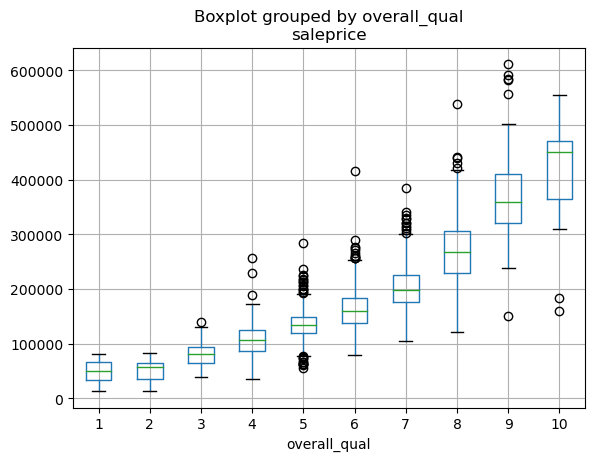

In [43]:
if run_type == 1:
    df.boxplot(column='saleprice', by='overall_qual') ;

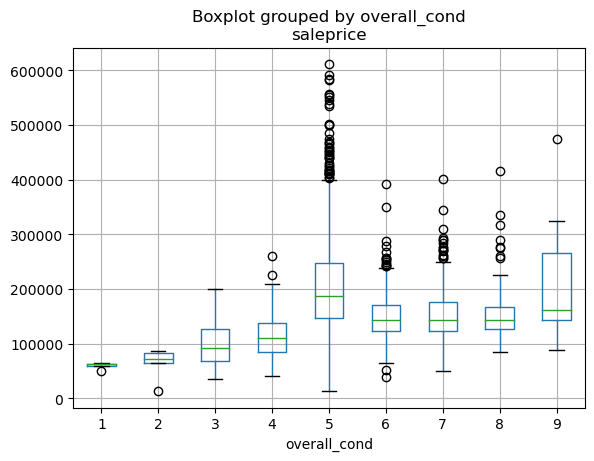

In [44]:
if run_type == 1:
    df.boxplot(column='saleprice', by='overall_cond') ;

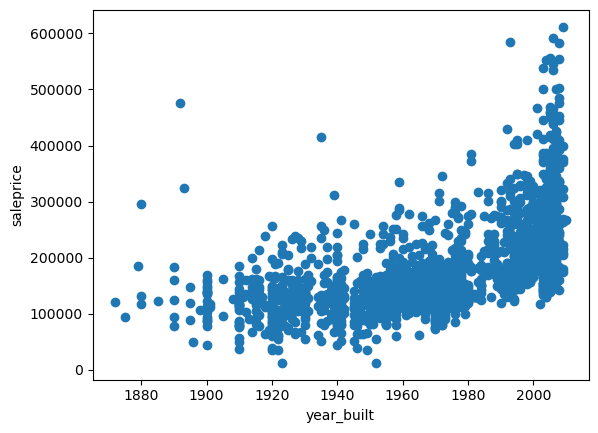

In [45]:
if run_type == 1:
    plt.scatter(df.year_built, df.saleprice) ;
    plt.xlabel('year_built')
    plt.ylabel('saleprice') ;
    # plt.scatter(pd.DataFrame(Z_train).year_built, lasso_cv.predict(Z_train), s=5, alpha=.5) ;   #doesn't work

### Converting other categorical data cols into One-Hot Encoded cols

In [46]:
df.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish',

In [47]:
# getdummies
dummy_cols_dropfirst = [
'ms_subclass',
'ms_zoning',
'street',
'land_contour',
'lot_config',
'neighborhood',
'condition_1',
'condition_2',
'bldg_type',
'house_style',
'roof_style',

'foundation',

'mo_sold',
'yr_sold',
]

dummy_cols_no_dropfirst = [
'alley',        # Has NaN's, don't drop first
'garage_type',  # Has NaN's, don't drop first

]

dummy_ignore_cols = [
    #temporarily removing--- NOT the problem
    
    
    #from no_first
'roof_matl',  # causes problems
'sale_type',  # causes problems
'heating',
'exterior_1st',
'exterior_2nd',

    #from no_dropfirst
'mas_vnr_type', # Has NaN's, don't drop first
'misc_feature', # Has NaN's, don't drop first
]

# df3 = pd.get_dummies(df, columns = dummy_cols_no_dropfirst, drop_first=False)
# df = df3

# df2 = pd.get_dummies(df, columns = dummy_cols_dropfirst, drop_first=True)
# df3 = pd.get_dummies(df2, columns = dummy_cols_no_dropfirst, drop_first=False)
# df = df3


In [48]:
# Create X and y.
if run_type==1:
    excluded_cols = ['id','saleprice'] + dummy_ignore_cols #+ dummy_cols_dropfirst + dummy_cols_no_dropfirst
else:
    excluded_cols = ['id'] + dummy_ignore_cols
    
Xnodummies = df.drop(columns= dummy_cols_dropfirst + dummy_cols_no_dropfirst + dummy_ignore_cols)
    
Xdropf = df[dummy_cols_dropfirst]
Xnodropf = df[dummy_cols_no_dropfirst]

In [49]:
Xdropf.head()

,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,foundation,mo_sold,yr_sold
0,60,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CBlock,3,2010
1,60,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,PConc,4,2009
2,20,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CBlock,1,2010
3,60,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,PConc,4,2010
4,50,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,PConc,3,2010


In [50]:
pd.DataFrame(Xdropf).iloc[:,11].head()

0    CBlock
1     PConc
2    CBlock
3     PConc
4     PConc
Name: foundation, dtype: object

In [51]:
#Reference: 305-lesson-feature-engineering

# if run_type == 1:
#     oh_ydf = OneHotEncoder(drop='first', sparse=False)
#     oh_ndf = OneHotEncoder(drop=None, sparse=False)

#     X_oh_ydf = pd.DataFrame(oh_ydf.fit_transform(Xdropf))
#     X_oh_ndf = pd.DataFrame(oh_ndf.fit_transform(Xnodropf))
# else:
#     X_oh_ydf = pd.DataFrame(oh_ydf.transform(Xdropf))
#     X_oh_ndf = pd.DataFrame(oh_ndf.transform(Xnodropf))   


oh_ydf = OneHotEncoder(drop=None, sparse=False)    
# oh_ydf = OneHotEncoder(drop='first', sparse=False)
oh_ndf = OneHotEncoder(drop=None, sparse=False)

X_oh_ydf = pd.DataFrame(oh_ydf.fit_transform(Xdropf))
X_oh_ndf = pd.DataFrame(oh_ndf.fit_transform(Xnodropf))
    
    
oh_ydf.get_feature_names_out(Xdropf.columns)   # this is how you get the names

X_oh_ydf.shape

(2051, 121)

In [52]:
X_oh_ydf.columns = oh_ydf.get_feature_names_out(Xdropf.columns)
X_oh_ndf.columns = oh_ndf.get_feature_names_out(Xnodropf.columns)

In [53]:
X_oh_ndf.shape

(2051, 10)

In [54]:
Xnodummies.shape

(2051, 57)

In [55]:
type(X_oh_ydf)

pandas.core.frame.DataFrame

In [56]:
X_oh = pd.concat([Xnodummies, X_oh_ydf, X_oh_ndf], axis = 1)

X_oh.shape


# Kate Skibo's code:
# df = pd.concat([df, pd.get_dummies(df.select_dtypes('object'), dummy_na=False)], axis = 1)
# df = pd.concat([df, pd.get_dummies('ms_subclass', dummy_na=False)], axis = 1)

(2051, 188)

In [57]:
# # Reference: https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string
# # spike_cols = [col for col in df.columns if 'spike' in col]

ms_subclass_cols = [col for col in X_oh.columns if 'ms_subclass' in col]
ms_zoning_cols = [col for col in X_oh.columns if 'ms_zoning' in col]
land_contour_cols = [col for col in X_oh.columns if 'land_contour' in col]
lot_config_cols = [col for col in X_oh.columns if 'lot_config' in col]
neighborhood_cols = [col for col in X_oh.columns if 'neighborhood' in col]
condition_1_cols = [col for col in X_oh.columns if 'condition_1' in col]
condition_2_cols = [col for col in X_oh.columns if 'condition_2' in col]
bldg_type_cols = [col for col in X_oh.columns if 'bldg_type' in col]
house_style_cols = [col for col in X_oh.columns if 'house_style' in col]
roof_style_cols = [col for col in X_oh.columns if 'roof_style' in col]
roof_matl_cols = [col for col in X_oh.columns if 'roof_matl' in col]
exterior_1st_cols = [col for col in X_oh.columns if 'exterior_1st' in col]
exterior_2nd_cols = [col for col in X_oh.columns if 'foundation' in col]
heating_cols = [col for col in X_oh.columns if 'heating' in col]   #will pick up non-dummy col(s) also
mo_sold_cols = [col for col in X_oh.columns if 'mo_sold' in col]
yr_sold_cols = [col for col in X_oh.columns if 'yr_sold' in col]
sale_type_cols = [col for col in X_oh.columns if 'sale_type' in col]
alley_cols = [col for col in X_oh.columns if 'alley' in col]
mas_vnr_type_cols = [col for col in X_oh.columns if 'mas_vnr_type' in col]
garage_type_cols = [col for col in X_oh.columns if 'garage_type' in col]
misc_feature_cols = [col for col in X_oh.columns if 'misc_feature' in col]

In [58]:
roof_matl_cols

[]

In [59]:
Xnodummies.columns

Index(['id', 'lot_frontage', 'lot_area', 'lot_shape', 'utilities',
       'land_slope', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',
       'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd',
       'functional', 'fireplaces', 'fireplace_qu', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
       'fence', 'misc_val', 'saleprice'],
      dtype='object')

### Write intermediate cleaned dataset

In [60]:
if run_type == 1:
    X_oh.to_csv(f'./datasets/ames_cleaned_{run_id_number}.csv',index=False)
else:
    X_oh.to_csv(f'./datasets/test_cleaned_{run_id_number}.csv',index=False)

In [61]:
#troubleshooting datadumps---- remove for final
if run_type == 1:
    X_oh_ydf.to_csv(f'./datasets/troubleshooting_Train_X_oh_ydf_{run_id_number}.csv',index=False)
    X_oh_ndf.to_csv(f'./datasets/troubleshooting_Train_X_oh_ndf_{run_id_number}.csv',index=False)   
else:
    X_oh_ydf.to_csv(f'./datasets/troubleshooting_Contest_X_oh_ydf_{run_id_number}.csv',index=False)
    X_oh_ndf.to_csv(f'./datasets/troubleshooting_Contest_X_oh_ndf_{run_id_number}.csv',index=False) 


### Fitting a model

In [62]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [63]:
# df.isna().sum().sort_values(ascending=False).head(10)

In [64]:
# df.columns

In [65]:
# run_id_number =3   #COMMENT OUT LATER!!!!

In [66]:
train = pd.read_csv(f'./datasets/ames_cleaned_{run_id_number}.csv')

In [67]:
contest = pd.read_csv(f'./datasets/test_cleaned_{run_id_number}.csv')

FileNotFoundError: [Errno 2] No such file or directory: './datasets/test_cleaned_5.csv'

In [ ]:
train.shape

In [ ]:
#troubleshooting datadumps---- remove for final

X_train_oh_ydf = pd.read_csv(f'./datasets/troubleshooting_Train_X_oh_ydf_{run_id_number}.csv')
X_train_oh_ndf = pd.read_csv(f'./datasets/troubleshooting_Train_X_oh_ndf_{run_id_number}.csv')

X_contest_oh_ydf = pd.read_csv(f'./datasets/troubleshooting_Contest_X_oh_ydf_{run_id_number}.csv')
X_contest_oh_ndf = pd.read_csv(f'./datasets/troubleshooting_Contest_X_oh_ndf_{run_id_number}.csv')

In [ ]:
# Method from Kate Skibo via Katie Sylvia
# X = cdf.drop(columns=['id']).drop(columns=(list(set(cdf) - set(ctest))))

train_trimmed = train.drop(columns=(list(set(train) - set(contest))))
train_trimmed['saleprice'] = train['saleprice']

In [ ]:
# Used for an intermediate, unsuccessful model. Didn't end up useful

top_cols_only = ['exter_qual', 
                 'kitchen_qual', 
                 'land_slope', 
                 'full_bath', 
                 'bsmt_qual', 
                 'overall_qual', 
                 'totrms_abvgrd', 
                 'half_bath', 
                 'fireplaces', 
                 'garage_cars', 
                 'bsmt_full_bath', 
                 'functional', 
                 'heating_qc', 
                 'overall_cond', 
                 'paved_drive', 
                 'bsmt_exposure', 
                 'bsmtfin_type_1', 
                 'fireplace_qu', 
                 'bsmtfin_type_2', 
                 'bsmt_half_bath', 
                 'pool_area', 
                 'fence', 
                 'lot_frontage', 
                ]

In [ ]:
# # Create X and y.

# #Re-defined (identical as before/above) in case code is split into separate files
# if run_type==1:
#     excluded_cols = ['id','saleprice'] #+ dummy_ignore_cols  #dummy ignore already taken out when writing to the file that gets read in for 'Fitting a Model' section
# else:
#     excluded_cols = ['id'] #+ dummy_ignore_cols


# X = train.drop(columns=excluded_cols)
# y = train['saleprice']

# # X_contest = contest[top_cols_only]    # didn't end up useful
# X_contest = contest.drop(columns=excluded_cols)

In [ ]:
# Create X and y.

X = train_trimmed.drop(columns=['id','saleprice'])
y = train['saleprice']

# X_contest = contest[top_cols_only]    # didn't end up useful
X_contest = contest.drop(columns=excluded_cols)
# X_contest = contest.drop(columns='id')

In [ ]:
# X.columns
X.shape

In [ ]:
# X_contest.columns
X_contest.shape

In [ ]:
list(set(X) - set(X_contest))

In [ ]:
# Reference: https://stackoverflow.com/questions/68152902/extracting-only-object-type-columns-in-a-separate-list-from-a-data-frame-in-pand
X_contest.select_dtypes(include='object')
# col_list = df_flights.select_dtypes(include=['object']).columns.to_list()
X_contest.select_dtypes(include=['object']).columns.to_list()

#### Basic Linear Model

In [ ]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, cv=10))

In [ ]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(
    X, y, 
    test_size=.7, 
    random_state=42
)

lr.fit(Xl_train, yl_train)
lr.score(Xl_train, yl_train)

In [ ]:
lr.score(Xl_test, yl_test)

In [ ]:
# y_predict_linear = lr.predict(X_contest)
y_predict_linear = lr.predict(X_contest)

In [ ]:
# Kate Skibbo's code: set(zip(X.columns, lr.coef_)) 
# set(zip(Z_test.columns,lasso_cv.coef_))  #mine. didn't work

# list(zip(X.columns, lr.coef_))
# pd.DataFrame(list(zip(X.columns, lr.coef_)))
pd.DataFrame(list(zip(X.columns, lr.coef_))).sort_values(by=[1], ascending=False).head()

#### Poly-fit Model

In [ ]:
# Reference: 403-lesson-regularization

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit, y, 
    test_size=.7, 
    random_state=42,
    # stratify = y     #breaks things: ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


ols = LinearRegression()
ols.fit(Z_train, y_train)

ols.score(Z_train, y_train)

In [ ]:
ols.score(Z_test, y_test)

In [ ]:
Z_train.shape

In [ ]:
Z_test.shape

In [ ]:
X_test.shape

In [ ]:
X_contest_overfit = poly.fit_transform(X_contest)
Z_contest = sc.transform(X_contest_overfit)

In [ ]:
# pd.DataFrame(X_contest_overfit).head()
pd.DataFrame(X_contest).head()

In [ ]:
y_predict_overfit = ols.predict(Z_contest)

#### Ridge model

In [ ]:
# Reference: 403-lesson-regularization

from sklearn.linear_model import Ridge, RidgeCV


# Z_train, Z_test, y_train, y_test are re-used from Poly-fit section above

# Instantiate.
ridge = Ridge(alpha=10)
# Fit.
ridge.fit(Z_train, y_train)

In [ ]:
ridge.score(Z_train, y_train)


In [ ]:
ridge.score(Z_test, y_test)

In [ ]:
r_alphas = np.logspace(4, 5, 100)    # checks 1000 different alphas on each of the 5 k-folds

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)   #default alphas are .1, 1.0, 10

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
ridge_cv.score(Z_train, y_train)

In [ ]:
ridge_cv.score(Z_test, y_test)

In [ ]:
y_predict_ridge = ridge_cv.predict(Z_contest)

In [ ]:
# plt.scatter(df.year_built, df.saleprice) ;
# plt.xlabel('year_built')
# plt.ylabel('saleprice') ;
# # plt.scatter(pd.DataFrame(X_test).loc[columns==7], ridge_cv.predict(Z_test), s=5, alpha=.5) ;   #doesn't work

In [ ]:
Xridge = pd.DataFrame(contest['id'])
Xridge['SalePrice'] = y_predict_ridge
Xridge.columns = ['Id','SalePrice']
Xridge.set_index('Id', inplace = True)
Xridge.shape
Xridge.to_csv(f'./output/predictions_{run_id_number}_ridge.csv')

#### LASSO model

In [ ]:
# Reference: 403-lesson-regularization

from sklearn.linear_model import Lasso, LassoCV

# Set up a list of Lasso alphas to check.
# l_alphas= np.logspace(-3, -1, 100)
l_alphas= np.logspace(3.895, 3.9, 50)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)


In [ ]:
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

In [ ]:
# Here is the optimal value of alpha
lasso_cv.alpha_

In [ ]:
lasso_cv.score(Z_train, y_train)

In [ ]:
lasso_cv.score(Z_test, y_test)

In [ ]:
y_predict_lasso = lasso_cv.predict(Z_contest)

In [ ]:
Xf = pd.DataFrame(contest['id'])
Xf['SalePrice'] = y_predict_lasso
Xf.columns = ['Id','SalePrice']
Xf.set_index('Id', inplace = True)
Xf.shape

In [ ]:
Xf.to_csv(f'./output/predictions_{run_id_number}_lasso.csv')

In [ ]:
# lasso_cv.coef_
pd.DataFrame(list(zip(pd.DataFrame(X_test).columns, lasso_cv.coef_))).sort_values(by=[1], ascending=False).head(6)

In [ ]:
# poly.get_feature_names(X.columns)
pd.DataFrame(list(zip(poly.get_feature_names_out(X.columns), lasso_cv.coef_))).sort_values(by=[1], ascending=False)

In [ ]:
# pd.DataFrame(list(zip(poly.get_feature_names(X.columns), lasso_cv.coef_))).loc[[0].str.isna()]   #doesn't work

In [ ]:
# y_predict_lr = lr.predict(X_contest)

In [ ]:
lasso_cv.coef_